In [ ]:
# 기본 옵션
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9)
options(scipen = 100)
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

## 주 성분 분석
- 서로 연관되어 있는 변수들이 관측되었을때, 이 변수들이 전체적으로 가지고 있는 정보를 최대한 확보하는 적은수의 새로운 변수를 생성하는 방법 

In [25]:
# 설문지를 이용한 주 성분 분석
pasta <- read.table("Data/pasta.txt")
head(pasta)

,noodle,dishes,sauce
,<int>,<int>,<int>
pesto_alla_Genovese,2,4,5
Marinara,1,5,1
Puttanesca,5,3,4
Primavera,2,2,3
Vongole,3,5,5
Boscaiola,4,3,2


In [27]:
# 다중 공선성 확인 : 너무 상관이 높아서 마치 쌍둥이 데이터인 것 찾기
cor(pasta)
summary(pasta)

,noodle,dishes,sauce
noodle,1.0000000,0.1905002,0.3600411
dishes,0.1905002,1.0000000,0.3004804
sauce,0.3600411,0.3004804,1.0000000


     noodle      dishes         sauce     
 Min.   :1   Min.   :2.00   Min.   :1.00  
 1st Qu.:2   1st Qu.:3.00   1st Qu.:2.00  
 Median :3   Median :3.50   Median :3.00  
 Mean   :3   Mean   :3.60   Mean   :2.90  
 3rd Qu.:4   3rd Qu.:4.75   3rd Qu.:3.75  
 Max.   :5   Max.   :5.00   Max.   :5.00  

In [28]:
# 표준화 : 평균을 0으로, 표준편차를 1로 변경
data1 <- scale(pasta)
summary(data1)
apply(data1, 2, sd)

     noodle            dishes             sauce         
 Min.   :-1.3416   Min.   :-1.36311   Min.   :-1.31112  
 1st Qu.:-0.6708   1st Qu.:-0.51117   1st Qu.:-0.62106  
 Median : 0.0000   Median :-0.08519   Median : 0.06901  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.6708   3rd Qu.: 0.97973   3rd Qu.: 0.58656  
 Max.   : 1.3416   Max.   : 1.19272   Max.   : 1.44914  

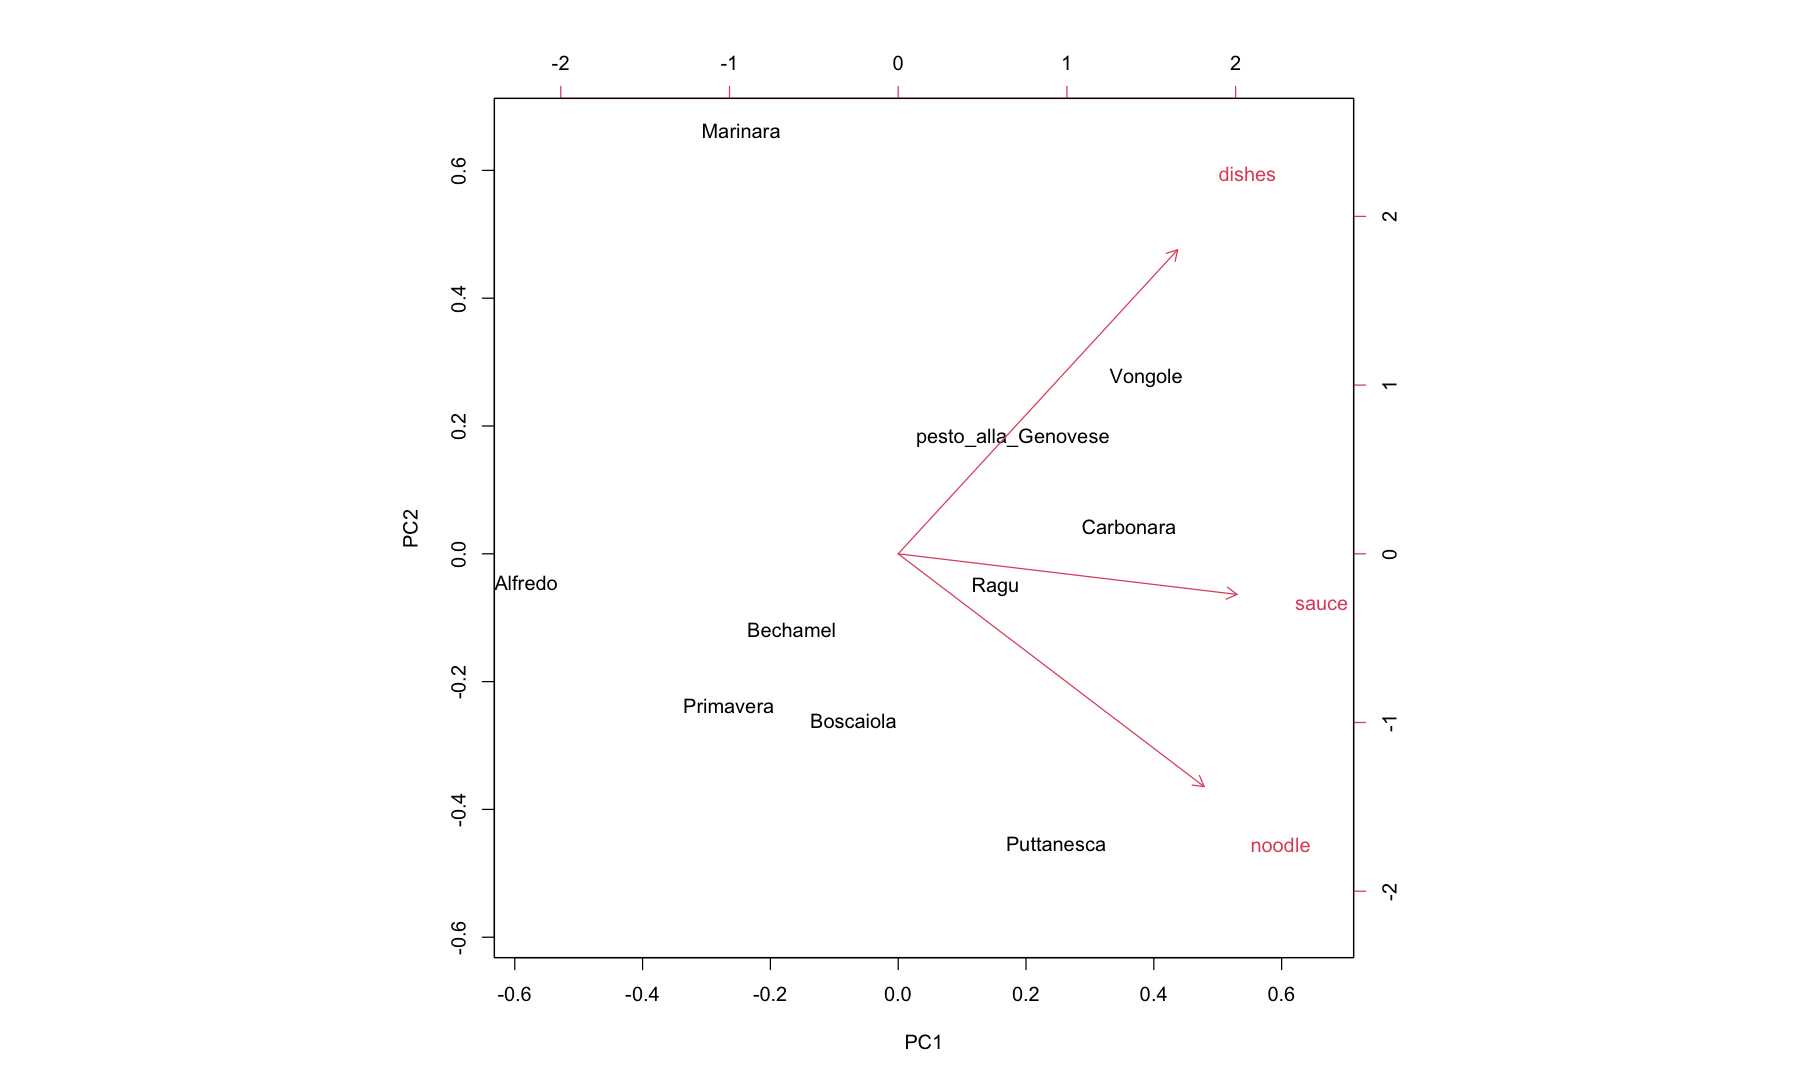

In [35]:
# 주 성분 분석
par(bg = 'white')
p1 <- prcomp(pasta,scale = T)
biplot(p1)

In [38]:
라면 <- read.table("Data/라면.txt")
라면

par(bg = 'white', family = 'applegothic')
biplot(prcomp(라면,scale = T))

---
# US Arrests
- 이 데이터 세트에는 1973년 미국 50개주에서 각각 10만명 당 폭행, 살인, 강간으로 체포된 통계가 있다.

    또한 도시 지역에 살고 있는 인구의 비율도 주어진다.

In [47]:
data(USArrests)
head(USArrests)
nrow(USArrests)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


[1] 50

In [48]:
# 데이터의 상관관계
cor(USArrests)

,Murder,Assault,UrbanPop,Rape
Murder,1.00000000,0.8018733,0.06957262,0.5635788
Assault,0.80187331,1.0000000,0.25887170,0.6652412
UrbanPop,0.06957262,0.2588717,1.00000000,0.4113412
Rape,0.56357883,0.6652412,0.41134124,1.0000000


In [51]:
# 주 성분 분석
result <- princomp(USArrests, cor=T)
summary(result)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4
Standard deviation     1.5748783 0.9948694 0.5971291 0.41644938
Proportion of Variance 0.6200604 0.2474413 0.0891408 0.04335752
Cumulative Proportion  0.6200604 0.8675017 0.9566425 1.00000000

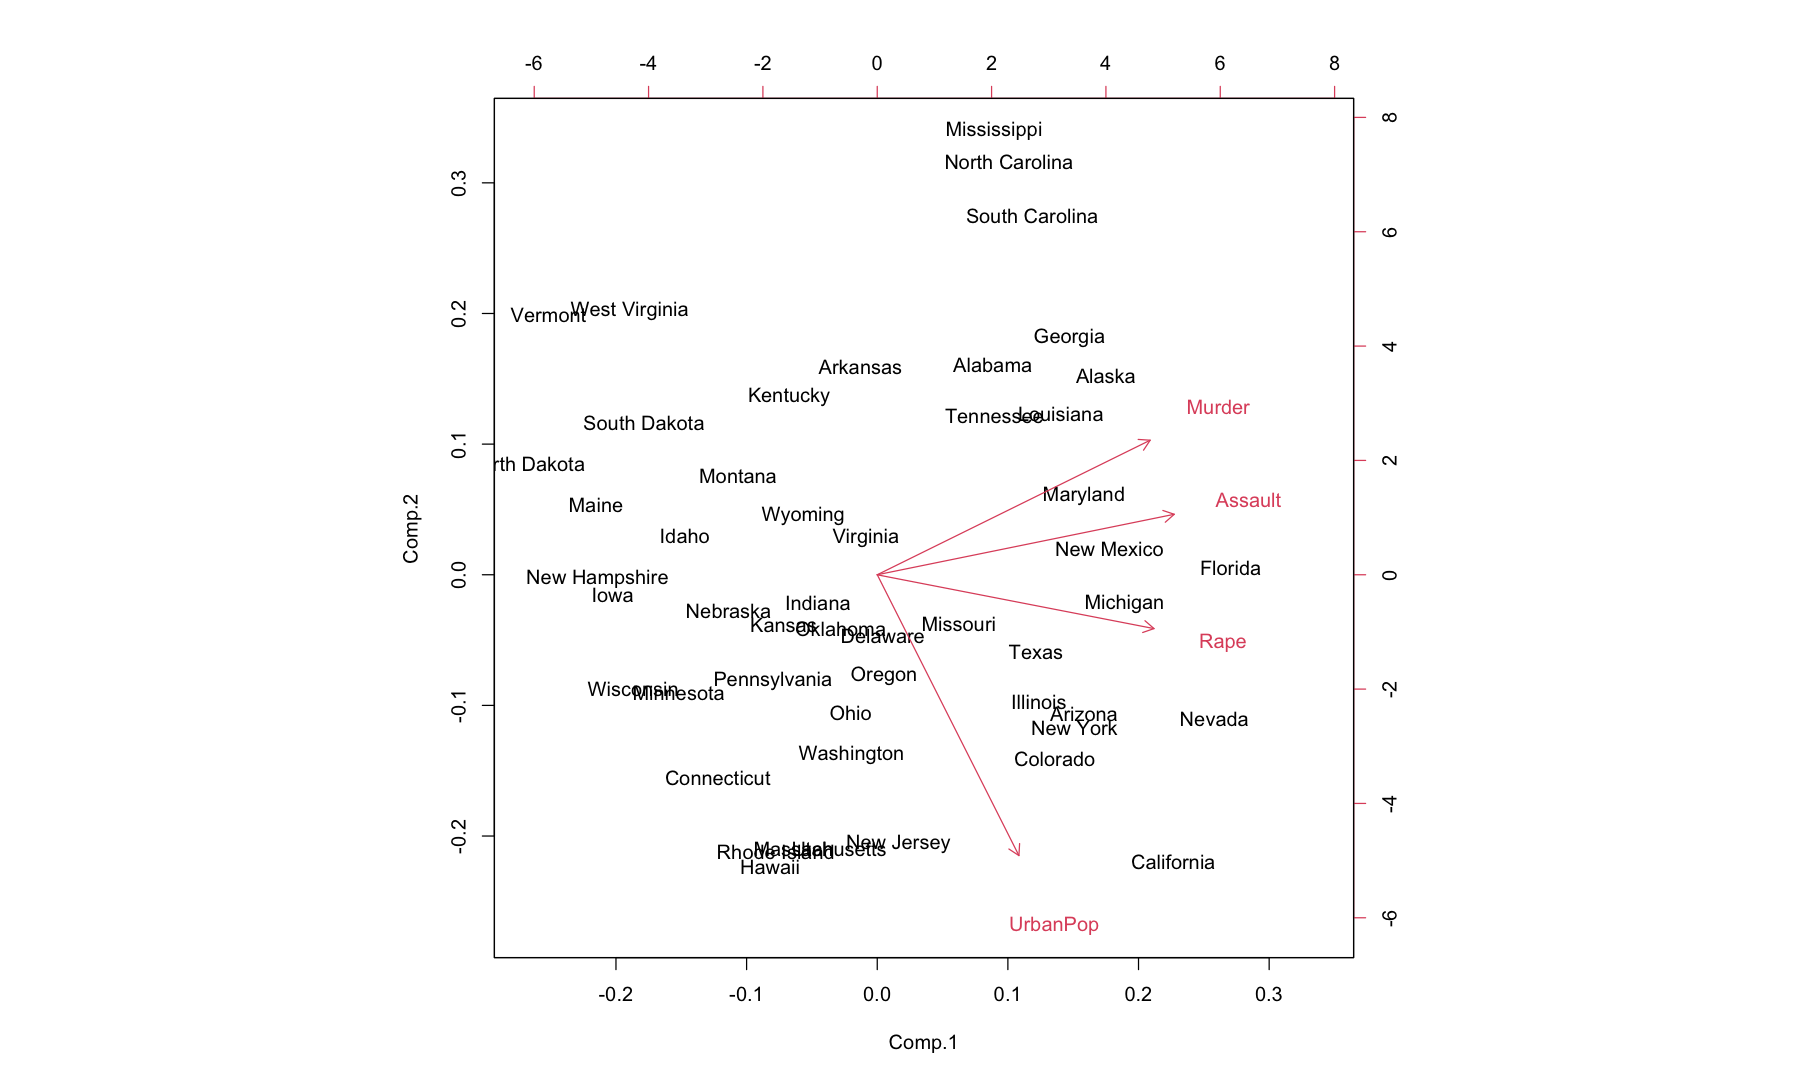

In [53]:
par(bg = 'white')
biplot(result)

In [58]:
# Comp1, Comp2
result$loadings


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4
Murder    0.536  0.418  0.341  0.649
Assault   0.583  0.188  0.268 -0.743
UrbanPop  0.278 -0.873  0.378  0.134
Rape      0.543 -0.167 -0.818       

               Comp.1 Comp.2 Comp.3 Comp.4
SS loadings      1.00   1.00   1.00   1.00
Proportion Var   0.25   0.25   0.25   0.25
Cumulative Var   0.25   0.50   0.75   1.00

제 1주성분(Comp1) = (Murder * 0.536) + (Assault * 0.583) + (UrbanPop * 0.278) + (Rape * 0.543)

In [105]:
# 제 1주성분으로 새로운 변수값 생성
score <- result$loadings[1,1] * USArrests[,1] + 
         result$loadings[2,1] * USArrests[,2] + 
         result$loadings[3,1] * USArrests[,3] + 
         result$loadings[4,1] * USArrests[,4]

In [109]:
Result <- data.frame(States = rownames(USArrests),Score = score)
head(Result)

,States,Score
,<chr>,<dbl>
1,Alabama,172.3610
2,Alaska,196.2722
3,Arizona,214.8984
4,Arkansas,140.0273
5,California,213.1605
6,Colorado,165.9328


In [111]:
# library(dplyr)
head(arrange(Result, desc(score)),10)

,States,Score
,<chr>,<dbl>
1,Florida,243.2101
2,North Carolina,224.7674
3,Arizona,214.8984
4,Maryland,214.7570
5,California,213.1605
6,New Mexico,209.2341
7,Nevada,201.0316
8,Alaska,196.2722
9,South Carolina,196.0056
